# "CoinGecko API Wrapper in Julia Language - Part 1"
> "Basic Usage"
- toc: true
- badges: true
- comments: true
- categories: [jupyter, julialang, crypto]

# Basic API Documentation and Installation Information



One of the most powerfull crypto API's out there.
APIs are simple and easy to use, fully documented at the website.


("CoinGecko API" is a trademark of [CoinGecko](https://www.coingecko.com/en/))

## API Information:

[CoinGecko API](https://www.coingecko.com/en/api/documentation)

## Julia API Wrapper Package information:

Pls check my package information at the website for code and documentation.

[gjunqueira-sys / CoinGeckoAPI](https://github.com/gjunqueira-sys/CoinGeckoAPI.jl)

# Example Use: Get top 10 coins by Market Cap

In [1]:
#collapse-show

# Load dependancies

using CoinGeckoAPI;
using Plots;


In [2]:
# we will get top 10 market caps
# check API documentation for more information - we are interested in the /coins/markets function call for this example
# https://www.coingecko.com/en/api/documentation

# call the API, market cap in USD, optional arguments are:
# order: "market_cap_desc"
# per_page: 10
# page: 1

# We are getting only the top 10 market caps

r = get_coins_markets("usd", "order" => "market_cap_desc", "per_page" => "10", "page" => "1");

Now lets look at the output closer:

In [3]:
length(r)  


10

In [4]:
r |> length #or call the same  function but with the pipe operator, my preference!

10

In [5]:
r |> typeof # this is a vector output, with length 10

JSON3.Array{JSON3.Object, Base.CodeUnits{UInt8, String}, Vector{UInt64}}

we can check the first element:

In [6]:
r[1] 

JSON3.Object{Base.CodeUnits{UInt8, String}, SubArray{UInt64, 1, Vector{UInt64}, Tuple{UnitRange{Int64}}, true}} with 26 entries:
  :id                               => "bitcoin"
  :symbol                           => "btc"
  :name                             => "Bitcoin"
  :image                            => "https://assets.coingecko.com/coins/imag…
  :current_price                    => 48141
  :market_cap                       => 907941443592
  :market_cap_rank                  => 1
  :fully_diluted_valuation          => 1008064470982
  :total_volume                     => 28281205085
  :high_24h                         => 48990
  :low_24h                          => 46648
  :price_change_24h                 => -848.983
  :price_change_percentage_24h      => -1.73296
  :market_cap_change_24h            => -1.88657e10
  :market_cap_change_percentage_24h => -2.03556
  :circulating_supply               => 18914237
  :total_supply                     => 21000000
  :max_supply           

Now let us get all the keys and values pairs:

In [7]:
keys(r[1]) 

KeySet for a JSON3.Object{Base.CodeUnits{UInt8, String}, SubArray{UInt64, 1, Vector{UInt64}, Tuple{UnitRange{Int64}}, true}} with 26 entries. Keys:
  :id
  :symbol
  :name
  :image
  :current_price
  :market_cap
  :market_cap_rank
  :fully_diluted_valuation
  :total_volume
  :high_24h
  :low_24h
  :price_change_24h
  :price_change_percentage_24h
  :market_cap_change_24h
  :market_cap_change_percentage_24h
  :circulating_supply
  :total_supply
  :max_supply
  :ath
  ⋮

In [8]:
values(r[1])

ValueIterator for a JSON3.Object{Base.CodeUnits{UInt8, String}, SubArray{UInt64, 1, Vector{UInt64}, Tuple{UnitRange{Int64}}, true}} with 26 entries. Values:
  "bitcoin"
  "btc"
  "Bitcoin"
  "https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579"
  48141
  907941443592
  1
  1008064470982
  28281205085
  48990
  46648
  -848.982844209088
  -1.73296
  -1.8865720467968506e10
  -2.03556
  18914237
  21000000
  21000000
  69045
  ⋮

For this example, we are only interested in name and market cap.

We can use the following code to push names and values to vectors for plotting:

In [9]:
Vₙ = [];# name vector
Mc = []; #value vector
for i in 1:length(r)
    
    push!(Vₙ, r[i]["id"]); #get vector with names
    push!(Mc, r[i]["market_cap"]); #get vector with market caps
end

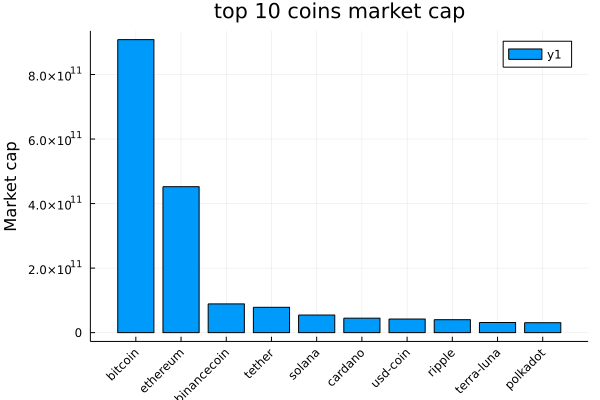

In [10]:
# plot top 10 coins, plot names in angles on horizontal axis

bar(Vₙ, Mc, title = "top 10 coins market cap", ylabel="Market cap", xrotation= 45 ) #plot market caps

That's it! 